In [ ]:
# Python exercise using linear and gradient boosted regression to test precision of a dataset in predicting home prices
# @reneeli890

# inspo from @shreyas3108 https://github.com/shreyas3108

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
%matplotlib inline

In [4]:
data = pd.read_csv("kc_house_data.csv")

In [5]:
# view first few rows of dataset

data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
# describe dataset

data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
# adjust price

data['price'] = data['price']/1000
display(data)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221.900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538.000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180.000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604.000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510.000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360.000,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400.000,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402.101,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400.000,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [51]:
# rename price to "price_thousands"

data.rename(columns = {'price':'price_thousands'}, inplace = True)
display(data)


,id,date,price_thousands,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221.900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538.000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180.000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604.000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510.000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360.000,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400.000,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402.101,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400.000,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [43]:
room_order = data['bedrooms'].unique()
print(room_order)

[ 3  2  4  5  1  6  7  0  8  9 11 10 33]


In [44]:
sorted_room = sorted(room_order)
print(sorted_room)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 33]


<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

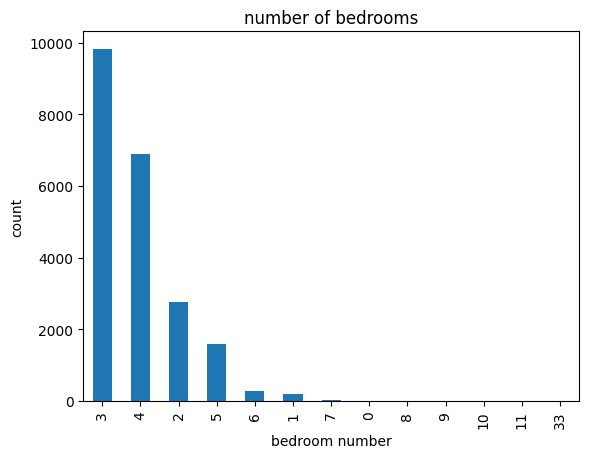

In [39]:
# plot count of records per number of bedrooms
data.bedrooms.value_counts().plot(kind='bar')
plt.title('number of bedrooms')
plt.xlabel('bedroom number')
plt.ylabel('count')
sns.despine

Text(0.5, 1.0, 'price (in 1000s) vs sqft')

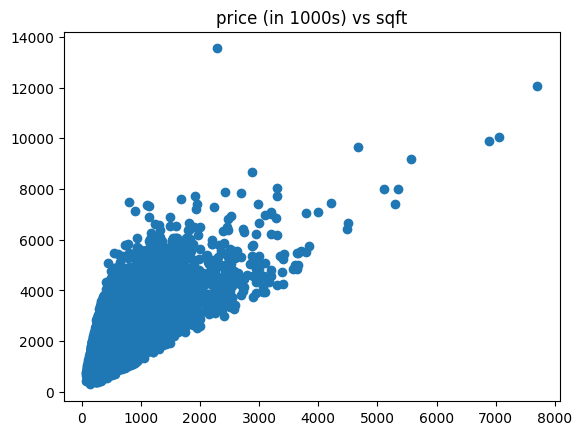

In [53]:
# plot price vs square feet 

plt.scatter(data.price_thousands,data.sqft_living)
plt.title('price (in 1000s) vs sqft')

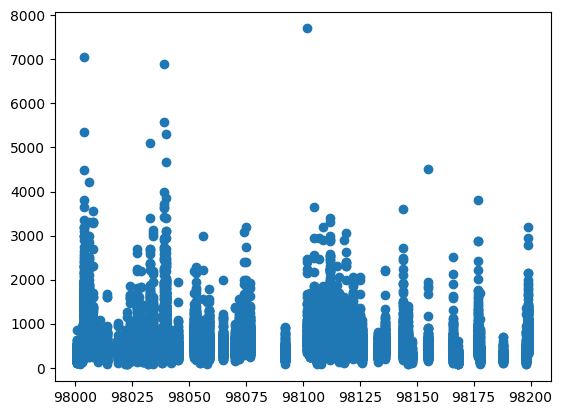

In [54]:
# which zipcodes contain the most expensive properties?

plt.scatter(data.zipcode, data.price_thousands)

In [57]:
# linear regression

# import sklearn and import linear regression

from sklearn.linear_model import LinearRegression



In [58]:
#initiate linear regression model in variable called model

model = LinearRegression()

In [59]:
# basic correlation calculation between sqft and zipcode in price

#define predictor and response variables
X, y = data[["zipcode", "sqft_living"]], data.price_thousands

#fit regression model
model.fit(X, y)

#calculate R-squared of regression model
r_squared = model.score(X, y)

#view R-squared value
print(r_squared)

# About 50% of the variation in the price can be explained by the square footage and zipcode in a property


0.5007002518842232


In [62]:
# Let's see how well our linear regression model will predict price

# output will be price
labels = data['price_thousands']

# change the yr_built to binary, 0 if new aka built after 2014, else 1
conv_dates = [1 if values == 2014 else 0 for values in data.yr_built]

# replace the date column in the data set
data['yr_built'] = conv_dates

# we also need to drop columns from the dataset we don't want to involve as variables. Obviously, need to remove price itself too.
train1 = data.drop(['id','price_thousands', 'date'], axis = 1) 

In [63]:
# import another operation to split train and test data
from sklearn.model_selection import train_test_split

# made test 10% of data, so the remaining 90% is training. and using random_state to randomize splitting of data
x_train, x_test, y_train, y_test = train_test_split(train1, labels, test_size = 0.10, random_state = 2)


# It doesn't matter if the random_state is 0 or 1 or any other integer. What matters is that it should be set the same value, if you want to validate your processing over multiple runs of the code. By the way I have seen random_state=42 used in many official examples of scikit as well as elsewhere also.

# random_state as the name suggests, is used for initializing the internal random number generator, which will decide the splitting of data into train and test indices in your case. In the documentation, it is stated that:

# If random_state is None or np.random, then a randomly-initialized RandomState object is returned.

# If random_state is an integer, then it is used to seed a new RandomState object.

# If random_state is a RandomState object, then it is passed through.

# This is to check and validate the data when running the code multiple times. Setting random_state a fixed value will guarantee that same sequence of random numbers are generated each time you run the code. And unless there is some other randomness present in the process, the results produced will be same as always. This helps in verifying the output.

In [66]:
# fit our test and train data into the linear regression model

model.fit(x_train,y_train)

LinearRegression()

In [67]:
# after fitting, can check how the model scores
model.score(x_test,y_test)

# 71% accuracy. So this means that using a linear regression model for price predicting will not be that accurate.

0.7076247496434063

In [71]:
# A more complex albeit stronger model for predicting is gradient boosting regression

from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'squared_error')

# n_estimator — The number of boosting stages to perform. Careful not to set too high which would overfit our model.

# max_depth — The depth of the tree node.

# learning_rate — Rate of learning the data.

# loss — loss function to be optimized. 

# minimum sample split — Number of sample to be split for learning the data

In [72]:
# Fit the gradient boosting model.

clf.fit(x_train, y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=400)

In [73]:
# Return the coefficient of determination of the prediction, or R2
# (x,y) = (test samples, true values)

clf.score(x_test,y_test)

# 92% 

0.9168906395637156